# Understanding police brutality against minorities: Evidence from deadly interactions with the police officers in the United States

### Introduction

Previous research has suggested that police officers tend to exhibit more brutality toward minority groups (Graham et al., 2020), which is a commonly recognized social issue and brought a lot of public’s attention lately due to the Black Lives Matter (BLM) movement (Updegrove, Cooper, Orrick, and Piquero, 2020). The project aims to investigate whether a person’s gender and race (*predictive covariates*) may play a role in their chance of being killed by police’s intentional use of deadly force (*outcome*) during their interactions with police in the United States. The data used in this project was obtained from the National Officer-Involved Homicide Database maintained by Dr. Brain Burghart and his research team at University of Southern California (John, 2020).

### Summary statistics

In [2]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../Data/fatal_encounters_dot_org.csv")

In [4]:
df[["Subject's gender", 
    "Subject's race with imputations",
    "Intentional Use of Force (Developing)"]].describe()

,Subject's gender,Subject's race with imputations,Intentional Use of Force (Developing)
count,28521,28448,28621
unique,3,7,11
top,Male,European-American/White,Intentional use of deadly force
freq,25789,13693,17307


In the table, it is observed that male subjects are the major gender in the sample; and the European-American/White is the major race among the subjects. Out of the 28621 fatal incidents, 17307 cases involved intentional use of deadly force.

### Data visualization

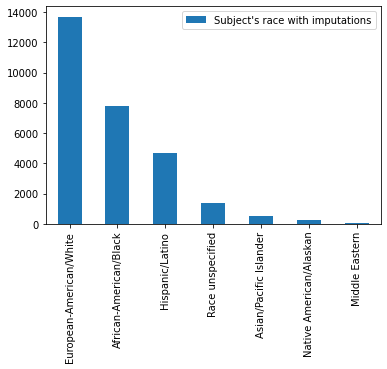

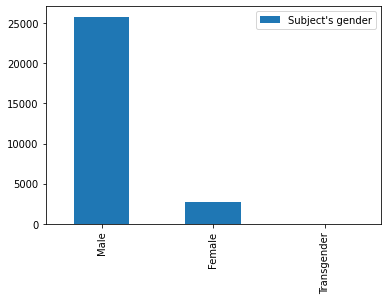

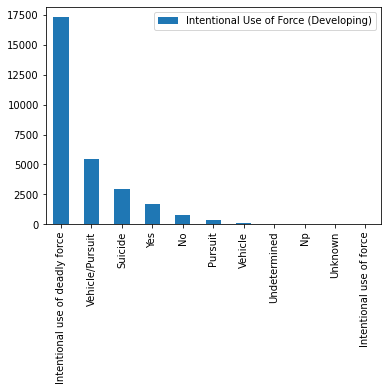

In [5]:
p1 = pd.DataFrame(df["Subject's race with imputations"].value_counts()).plot.bar()
p2 = pd.DataFrame(df["Subject's gender"].value_counts()).plot.bar()
p3 = pd.DataFrame(df["Intentional Use of Force (Developing)"].value_counts()).plot.bar()

These three bar charts above presented the distribution of the subject's race, subject's gender, and the situation of indentional use of force by the police. The reason why I chose these variables were explained in the introduction. Note that in the third bar chart, there were miscoded data, for example, "Intentional use of deadly force" and "Yes" should mean the same thing. 

In [6]:
# recatagorize the Intentional Use of Force variable into True or False
df["Intentional Use of Force (Developing)"] = df["Intentional Use of Force (Developing)"].str.replace(
    "Intentional use of deadly force", "Yes")
df["Intentional Use of Force (Developing)"] = df["Intentional Use of Force (Developing)"].str.replace(
    "Intentional use of force", "Yes")
df["Intentional Use of Force"] = df["Intentional Use of Force (Developing)"].str.match("Yes")

# access the percentage of intentional/non-intentional use of force in each racial group
g1 = df.groupby("Subject's race with imputations")["Intentional Use of Force"]
g1_summary = pd.DataFrame(g1.value_counts() / g1.count()).rename(
    columns={"Intentional Use of Force": "Percentage"}).reset_index()

# access the percentage of intentional/non-intentional use of force in each gender group
g2 = df.groupby("Subject's gender")["Intentional Use of Force"]
g2_summary = pd.DataFrame(g2.value_counts() / g2.count()).rename(
    columns={"Intentional Use of Force": "Percentage"}).reset_index()

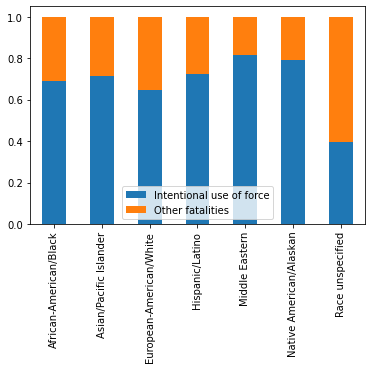

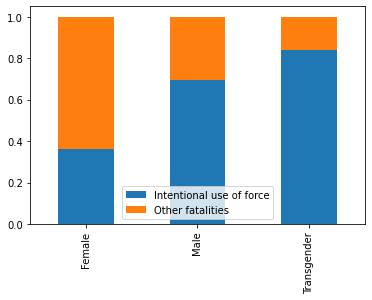

In [7]:
# plot the intentional/non-intentional use of force in each racial and gender group
p4 = pd.DataFrame({
    "Intentional use of force": list(g1_summary[g1_summary["Intentional Use of Force"] == True]["Percentage"]),
    "Other fatalities": list(g1_summary[g1_summary["Intentional Use of Force"] == False]["Percentage"])
},
    index=g1_summary["Subject's race with imputations"].unique()).plot.bar(stacked=True)
p5 = pd.DataFrame({
    "Intentional use of force": list(g2_summary[g2_summary["Intentional Use of Force"] == True]["Percentage"]),
    "Other fatalities": list(g2_summary[g2_summary["Intentional Use of Force"] == False]["Percentage"])
},
    index=g2_summary["Subject's gender"].unique()).plot.bar(stacked=True)


From these two graph above, it was observed that the police officers' decisions on using intentional fatal force differs from racial and gender groups. From the first graph, among all the racial group, Middle Eastern had the highest percentage on which intentional force was used. From the second graph, female objects were treated less by intentional force than male objects and transgender objects.

### References

Graham, A., Haner, M., Sloan, M. M., Cullen, F. T., Kulig, T. C., & Jonson, C. L. (2020). Race and worrying about police brutality: The hidden injuries of minority status in America. Victims & Offenders, 15(5), 549-573.

John M. (2020, June). Police Violence & Racial Equity - Part 1 of 3, Version 23. Retrieved February 1, 2022 from https://www.kaggle.com/jpmiller/police-violence-in-the-us.

Updegrove, A. H., Cooper, M. N., Orrick, E. A., & Piquero, A. R. (2020). Red states and Black lives: Applying the racial threat hypothesis to the Black Lives Matter movement. Justice Quarterly, 37(1), 85-108.